In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [2]:
df = pd.read_csv('gold_data_2015_25.csv')


In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2015-01-02,2058.199951,114.080002,159.119995,15.11,1.208941
1,2015-01-05,2020.579956,115.800003,150.320007,15.50,1.194643
2,2015-01-06,2002.609985,117.120003,144.399994,15.83,1.193902
3,2015-01-07,2025.900024,116.430000,146.960007,15.85,1.187536
4,2015-01-08,2062.139893,115.940002,148.399994,15.64,1.183600


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2666 non-null   object 
 1   SPX      2666 non-null   float64
 2   GLD      2666 non-null   float64
 3   USO      2666 non-null   float64
 4   SLV      2666 non-null   float64
 5   EUR/USD  2666 non-null   float64
dtypes: float64(5), object(1)
memory usage: 125.1+ KB


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,3504.231271,158.601665,80.319745,19.414055,1.118508
std,1212.323340,47.245813,27.665948,4.972436,0.052239
min,1829.079956,100.500000,17.040001,11.210000,0.959619
25%,2467.489929,120.650002,67.842497,15.530000,1.083887
50%,3168.685059,154.665001,78.254997,17.415000,1.115219
75%,4373.047607,178.547501,93.279999,22.547500,1.156076
max,6468.540039,316.290009,166.559998,35.720001,1.251001


In [25]:
df['Date'] = pd.to_datetime(df['Date'])

KeyError: 'Date'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2666 non-null   datetime64[ns]
 1   SPX      2666 non-null   float64       
 2   GLD      2666 non-null   float64       
 3   USO      2666 non-null   float64       
 4   SLV      2666 non-null   float64       
 5   EUR/USD  2666 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 125.1 KB


In [26]:
df.loc[df['Date'].dt.year == 2025]

KeyError: 'Date'

In [9]:
df.groupby(df['Date'].dt.year)[['SPX','GLD']].mean()

,SPX,GLD
Date,,
2015,2061.067741,111.146032
2016,2094.651264,119.362619
2017,2448.622495,119.714940
2018,2746.214183,120.177331
2019,2913.583816,131.561872
2020,3217.855849,166.653755
2021,4273.385635,168.311230
2022,4098.514748,167.905139
2023,4283.729439,180.449880


In [10]:
df.groupby(df['Date'].dt.year)[['SPX','GLD']].count()

,SPX,GLD
Date,,
2015,252,252
2016,252,252
2017,249,249
2018,251,251
2019,251,251
2020,253,253
2021,252,252
2022,251,251
2023,250,250


In [11]:
df = df.set_index('Date')

In [12]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
2015-01-02,2058.199951,114.080002,159.119995,15.11,1.208941
2015-01-05,2020.579956,115.800003,150.320007,15.50,1.194643
2015-01-06,2002.609985,117.120003,144.399994,15.83,1.193902
2015-01-07,2025.900024,116.430000,146.960007,15.85,1.187536
2015-01-08,2062.139893,115.940002,148.399994,15.64,1.183600


In [13]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.926828,-0.444909,0.889898,-0.180010
GLD,0.926828,1.000000,-0.447919,0.931117,-0.146464
USO,-0.444909,-0.447919,1.000000,-0.469935,-0.087394
SLV,0.889898,0.931117,-0.469935,1.000000,-0.018645
EUR/USD,-0.180010,-0.146464,-0.087394,-0.018645,1.000000


<Axes: >

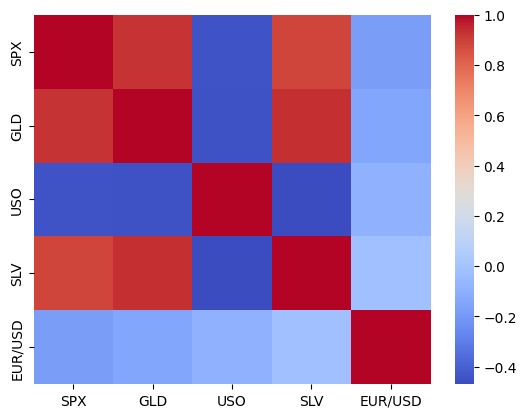

In [14]:
sns.heatmap(df.corr(), cmap="coolwarm")

<Axes: xlabel='Date'>

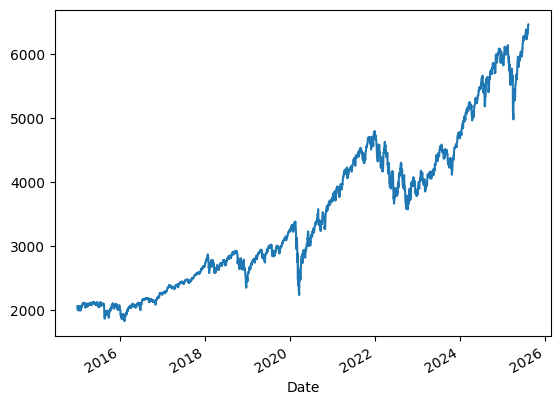

In [15]:
df['SPX'].plot()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
y = df['SPX']
x = df[['GLD', 'SLV']]

In [19]:
lr.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
predict = lr.predict(x)

<Axes: xlabel='Date', ylabel='SPX'>

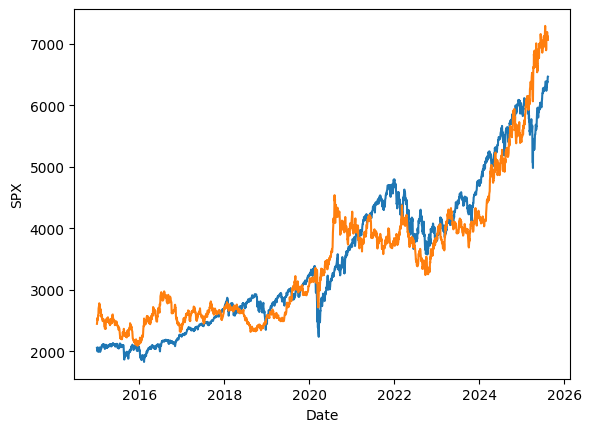

In [21]:
sns.lineplot(data=df,y='SPX',x=df.index)
sns.lineplot(y=predict,x=df.index)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [23]:
mean_absolute_error(y,predict)

364.9391191001146

In [24]:
mean_absolute_percentage_error(y,predict)

0.11117142909938171